# Laboratorio 7: Clasificación 🤗

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos - Primavera 2024</strong></center>


### Cuerpo Docente:

- Profesores: Ignacio Meza, Sebastián Tinoco
- Auxiliar: Eduardo Moya
- Ayudantes: Nicolás Ojeda, Melanie Peña, Valentina Rojas

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1:
- Nombre de alumno 2:

### **Link de repositorio de GitHub:** [Insertar Repositorio](https://github.com/...../)

### Temas a tratar
- Clasificación en problemas desbalanceados
- Lightgbm y xgboost
- Pipelines

### Reglas:

- **Grupos de 2 personas**
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Prohibidas las copias.
- Pueden usar cualquer matrial del curso que estimen conveniente.
- Código que no se pueda ejecutar, no será revisado.



### Objetivos principales del laboratorio
- Comprender cómo trabajar con problemas de clasificación con clases desbalanceadas.
- Aplicar los modelos lightgbm y xgboost.
- Practicar Pipelines

# Parte Teórica [12 puntos]




1. Explique cuál es la diferencia entre los datos de entrenamiento y validación. [1 punto]

2. Explique cuál es el principal desafío al trabajar problemas de clasificación con data no supervisada. [1 punto]

3. Explique en **sus palabras** qué es la matriz de confusión y para qué se utiliza. [1 puntos]

4. Escriba la fórmula de las siguientes métricas y explique con **sus palabras** cómo se interpretan. [1 punto cada uno]

  * Accuracy
  * Precision
  * Recall
  * F1 score

5. Explique qué métrica recomendaría para los siguientes contextos de clasificación. [1 punto cada uno]

  * Mantenimiento predictivo de fallas de maquinaria pesada en la industria minera.  
  * Detección de enfermedades altamente contagiosas.
  * Aprobación de créditos de alto riesgo.
  * Detección de crímenes.

6. Explique qué es la calibración de modelos y para qué se usa. [1 punto]


**Respuesta:**

*Escriba su respuesta aquí*

# Parte práctica [48 puntos]

<p align="center">
  <img src="https://i.ibb.co/61L8z0w/renacin-by-volframio-dcirf4l-fullview.jpg"
" width="400">
</p>



Tras el trágico despido de la mítica mascota de Maipú, Renacín decide adentrarse como consultor en el mercado futbolero, el cuál (para variar...) está cargado en especulaciones.

Como su principal tarea será asesorar a los directivos de los clubes sobre cuál jugador comprar y cuál no, Renacín desea generar modelos predictivos que evaluén distintas características de los jugadores; todo con el fin de tomar decisiones concretas basadas en los datos.

Sin embargo, su condición de corporeo le impidió tomar la versión anterior de MDS7202, por lo que este motivo Renacín contrata a su equipo para lograr su objetivo final. Dado que aún tiene fuertes vínculos con la dirección de deportes de la municipalidad, el corporeo le entrega base de datos con las estadísticas de cada jugador para que su equipo empieze a trabajar ya con un dataset listo para ser usado.


**Los Datos**

Para este laboratorio deberán trabajar con el csv `statsplayers.csv`, donde deberán aplicar algoritmos de aprendizaje supervisado de clasificación en base a características que describen de jugadores de fútbol.

Para comenzar cargue el dataset señalado y a continuación vea el reporte **`Player_Stats_Report.html`** (adjunto en la carpeta del enunciado) que describe las características principales del `DataFrame`.

In [1]:
# Si usted está utilizando Colabolatory le puede ser útil este código para cargar los archivos.
try:
    from google.colab import drive
    drive.mount("/content/drive")
    path = 'Dirección donde tiene los archivos en el Drive'
except:
    print('Ignorando conexión drive-colab')

Ignorando conexión drive-colab


## 1. Predicción de Seleccionados Nacionales [14 puntos]

<p align="center">
  <img src="https://www.futuro.cl/wp-content/uploads/2016/06/chile-argentina-meme-12.jpg" width="300">
</p>



### 1.1 Preprocesamiento [5 puntos]

Tareas:

1. Genere los labels para la clasificación binaria en una variable llamada `label`. Para esto, trabaje sobre el atributo `National_Position` suponiendo que los valores nulos son jugadores no seleccionados para representar a su país. [Sin puntaje]

2. Hecho esto, ¿cuántos se tienen ejemplos por cada clase? Comente lo que observa. [1 punto]

3. Genere un `ColumnTransformer` en donde especifique las transformaciones que hay que realizar para cada columna (por ejemplo StandarScaler, MinMaxScaler, OneHotEncoder, etc...) para que puedan ser utilizadas correctamente por el modelo predictivo y guárdelo una variable llamada `col_transformer`. [2 puntos]

4. Comente y justifique las transformaciones elegidas sobre cada una de las variables (para esto utilice el material `Player_Stats_Report.html` que viene en el zip del lab), al igual que las transformaciones aplicadas. [2 puntos]

**Respuesta:**

1. Generación de *labels*

In [1]:
import pandas as pd
df = pd.read_csv('stats_players.csv')
df.head()

,Name,Nationality,National_Position,Club_Position,Height,Weight,Preffered_Foot,Age,Work_Rate,Weak_foot,...,Agility,Jumping,Heading,Shot_Power,Finishing,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys
0,Cristiano Ronaldo,Portugal,LS,LW,185,80,Right,32,High / Low,4,...,90,95,85,92,93,90,81,76,85,88
1,Lionel Messi,Argentina,RW,RW,170,72,Left,29,Medium / Medium,4,...,90,68,71,85,95,88,89,90,74,85
2,Neymar,Brazil,LW,LW,174,68,Right,25,High / Medium,5,...,96,61,62,78,89,77,79,84,81,83
3,Luis Suárez,Uruguay,LS,ST,182,85,Right,30,High / Medium,4,...,86,69,77,87,94,86,86,84,85,88
4,Manuel Neuer,Germany,GK,GK,193,92,Right,31,Medium / Medium,4,...,52,78,25,25,13,16,14,11,47,11


In [2]:
# Generación de columna 'label' en base a columna 'National_Position'
df['label'] = df['National_Position'].apply(lambda x: 1 if pd.notnull(x) else 0)

2. Conteo de clases

In [3]:
df['label'].value_counts()

label
0    16513
1     1075
Name: count, dtype: int64

Como se puede ver, existen $16.513$ jugadores que no poseen una posición definida en su selección nacional, habiendo en cambio $1.075$ que sí tienen una posición en la selección nacional de su país.

3. Generación de `ColumnTransformer`

In [4]:
# Primero veremos el tipo de dato en cada columna.
df.dtypes

Name                 object
Nationality          object
National_Position    object
Club_Position        object
Height                int64
Weight                int64
Preffered_Foot       object
Age                   int64
Work_Rate            object
Weak_foot             int64
Skill_Moves           int64
Ball_Control          int64
Dribbling             int64
Marking               int64
Sliding_Tackle        int64
Standing_Tackle       int64
Aggression            int64
Reactions             int64
Interceptions         int64
Vision                int64
Composure             int64
Crossing              int64
Short_Pass            int64
Long_Pass             int64
Acceleration          int64
Speed                 int64
Stamina               int64
Strength              int64
Balance               int64
Agility               int64
Jumping               int64
Heading               int64
Shot_Power            int64
Finishing             int64
Long_Shots            int64
Curve               

In [5]:
# Ahora generaremos una descripción para cada columna numérica
df.describe()

,Height,Weight,Age,Weak_foot,Skill_Moves,Ball_Control,Dribbling,Marking,Sliding_Tackle,Standing_Tackle,...,Jumping,Heading,Shot_Power,Finishing,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys,label
count,17588.00000,17588.000000,17588.000000,17588.000000,17588.000000,17588.000000,17588.000000,17588.000000,17588.000000,17588.000000,...,17588.000000,17588.000000,17588.000000,17588.000000,17588.000000,17588.000000,17588.000000,17588.000000,17588.000000,17588.000000
mean,181.10547,75.253355,25.460314,2.934103,2.303161,57.972766,54.802877,44.230327,45.565499,47.441096,...,64.918524,52.393109,55.581192,45.157607,47.403173,47.181146,43.383443,49.165738,43.275586,0.061121
std,6.67516,6.897948,4.680217,0.655927,0.746156,16.834779,18.913857,21.561703,21.515179,21.827815,...,11.430807,17.473703,17.600155,19.374428,19.211887,18.464396,17.701903,15.871735,17.710839,0.239559
min,155.00000,48.000000,17.000000,1.000000,1.000000,5.000000,4.000000,3.000000,5.000000,3.000000,...,15.000000,4.000000,3.000000,2.000000,4.000000,6.000000,4.000000,7.000000,3.000000,0.000000
25%,176.00000,70.000000,22.000000,3.000000,2.000000,53.000000,47.000000,22.000000,23.000000,26.000000,...,58.000000,45.000000,45.000000,29.000000,32.000000,34.000000,31.000000,39.000000,30.000000,0.000000
50%,181.00000,75.000000,25.000000,3.000000,2.000000,63.000000,60.000000,48.000000,51.000000,54.000000,...,65.000000,56.000000,59.000000,48.000000,52.000000,48.000000,42.000000,50.000000,44.000000,0.000000
75%,186.00000,80.000000,29.000000,3.000000,3.000000,69.000000,68.000000,64.000000,64.000000,66.000000,...,73.000000,65.000000,69.000000,61.000000,63.000000,62.000000,57.000000,61.000000,57.000000,0.000000
max,207.00000,110.000000,47.000000,5.000000,5.000000,95.000000,97.000000,92.000000,95.000000,92.000000,...,95.000000,94.000000,93.000000,95.000000,91.000000,92.000000,93.000000,96.000000,93.000000,1.000000


In [6]:
# Veamos la cantidad de valores únicos por columna
df.nunique()

Name                 17341
Nationality            160
National_Position       27
Club_Position           29
Height                  50
Weight                  56
Preffered_Foot           2
Age                     29
Work_Rate                9
Weak_foot                5
Skill_Moves              5
Ball_Control            88
Dribbling               92
Marking                 89
Sliding_Tackle          88
Standing_Tackle         89
Aggression              88
Reactions               67
Interceptions           90
Vision                  85
Composure               85
Crossing                85
Short_Pass              83
Long_Pass               85
Acceleration            86
Speed                   85
Stamina                 86
Strength                77
Balance                 86
Agility                 83
Jumping                 74
Heading                 90
Shot_Power              88
Finishing               94
Long_Shots              88
Curve                   87
Freekick_Accuracy       87
P

In [7]:
# Conteo de nulos por columna
df.isnull().sum()

Name                     0
Nationality              0
National_Position    16513
Club_Position            1
Height                   0
Weight                   0
Preffered_Foot           0
Age                      0
Work_Rate                0
Weak_foot                0
Skill_Moves              0
Ball_Control             0
Dribbling                0
Marking                  0
Sliding_Tackle           0
Standing_Tackle          0
Aggression               0
Reactions                0
Interceptions            0
Vision                   0
Composure                0
Crossing                 0
Short_Pass               0
Long_Pass                0
Acceleration             0
Speed                    0
Stamina                  0
Strength                 0
Balance                  0
Agility                  0
Jumping                  0
Heading                  0
Shot_Power               0
Finishing                0
Long_Shots               0
Curve                    0
Freekick_Accuracy        0
P

Tenemos diferentes tipos de datos en este dataset, existiendo características numéricas que tienen poca variación (por ejemplo `National_Positions`) y otras con bastante variación (`Dribbling`, `Aggression`, entre otras), además de variables de tipo *string* que pueden tener muchos o pocos valores. En resumen, tenemos los siguientes tipos de categorías:

1. **Variables Numéricas**: `Height`, `Weight`, `Age`, `Ball_Control`, `Dribbling`, `Marking`, `Sliding_Tackle`, `Standing_Tackle`, `Aggression`, `Reactions`, `Interceptions`, `Vision`, `Composure`, `Crossing`, `Short_Pass`, `Long_Pass`, `Acceleration`, `Speed`, `Stamina`, `Strength`, `Balance`, `Agility`, `Jumping`, `Heading`, `Shot_Power`, `Finishing`, `Long_Shots`, `Curve`, `Freekick_Accuracy`, `Penalties`, `Volleys`.
2. **Variables Categóricas**: `Nationality`, `National_Position`, `Club_Position`, `Preffered_Foot`, `Work_Rate`, `Weak_foot`, `Skill_Moves`.
3. **Variables tipo string**: `Name`.

Esto nos lleva a pensar de que podemos hacer las siguientes transformaciones:

In [8]:
# Transformar las variables numéricas tipo calificación con MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

num_columns = ['Height', 'Weight', 'Age', 'Ball_Control', 'Dribbling', 'Marking', 'Sliding_Tackle', 'Standing_Tackle',
               'Aggression', 'Reactions', 'Interceptions', 'Vision', 'Composure', 'Crossing', 'Short_Pass', 'Long_Pass',
               'Acceleration', 'Speed', 'Stamina', 'Strength', 'Balance', 'Agility', 'Jumping', 'Heading', 'Shot_Power',
               'Finishing', 'Long_Shots', 'Curve', 'Freekick_Accuracy', 'Penalties', 'Volleys']
num_scaler = MinMaxScaler()

# Transformar las variables categóricas con OneHotEncoder
from sklearn.preprocessing import OneHotEncoder

cat_columns = ['Nationality', 'Preffered_Foot', 'Work_Rate', 'Weak_foot', 'Skill_Moves']
cat_encoder = OneHotEncoder(handle_unknown='infrequent_if_exist')

# Crear un ColumnTransformer para aplicar las transformaciones a las columnas correspondientes
from sklearn.compose import ColumnTransformer

col_transformer = ColumnTransformer([
    ('num', num_scaler, num_columns),
    ('cat', cat_encoder, cat_columns)
])

4. Justificación

Estas transformaciones se realizan por las siguientes razones:

* Dentro de las variables numéricas existen $3$ que podríamos considerar como una excepción a la generalización que se va a explicar: `Height`, `Weight` y `Age`. El resto de variables (`Dribbling`, `Aggression`, etc.) son una calificación que se le da al jugador entre $1$ y $100$ (aunque no existen jugadores con alguna marca perfecta). Todas estas variables numéricas las podemos normalizar entre $0$ y $1$ usando `MinMaxScaler`.

* Las variables `Height`, `Weight` y `Age` no se rankean entre $1$ y $100$ y no significan un "más alto es mejor". De todas formas se deben escalar a valores entre $0$ y $1$.

* Las variables categóricas justamente categorizan a los jugadores según procedencia y otros aspectos más cualitativos, además de existir variables de tipo `string` (nacionalidades y posiciones). Las variables cuantitativas siguen siendo una categorización con un orden específico. Para todas estas se usa una transformación tipo `OneHotEncoder`.

Además, no trabajaremos con las siguientes variables:

* `Name`: Identifica simplemente al jugador.
* `National_Position`: Con esta columna se implementaron los labels.

Estas variables **no debe influir** en el funcionamiento del algoritmo.

### 1.2 Entrenamiento [3 puntos]

Ahora, vamos a entrenar los pipelines generados en los pasos anteriores. Para esto, debe realizar las siguientes tareas:

1. Separe los datos de entrenamiento en un conjunto de entrenamiento y de prueba  (la proporción queda a su juicio). En este paso, seleccione los ejemplos de forma aleatoria e intente mantener la distribución original de labels de cada clase en los conjuntos de prueba/entrenamiento. (vea la documentación de `train_test_split`). [1 puntos]


2. Defina un pipeline llamado `pipeline_xgboost` y otro llamado `pipeline_lightgbm`. Estos pipelines deben tener el mismo ColumnTransformer definido en la sección de preprocesamiento, pero deben variar los clasificadores de acuerdo al nombre de cada pipeline. [1 puntos]

3. Entrene los pipelines. [1 punto]



**Respuesta:**

1. Separación de datos

In [9]:
from sklearn.model_selection import train_test_split

features = df.drop(columns = ['Name', 'National_Position', 'label'])
labels = df.loc[:, 'label']

X_train, X_test, y_train, y_test = train_test_split(
    features, labels, test_size=0.33, shuffle=True, stratify=labels, random_state=30
)

In [10]:
# Revisar la distribución de etiquetas en los conjuntos de entrenamiento y prueba
print('Distribución de etiquetas en el conjunto de entrenamiento:')
y_train.value_counts() / y_train.count() * 100

Distribución de etiquetas en el conjunto de entrenamiento:


label
0    93.889502
1     6.110498
Name: count, dtype: float64

In [11]:
print('Distribución de etiquetas en el conjunto de prueba:')
y_test.value_counts() / y_test.count() * 100

Distribución de etiquetas en el conjunto de prueba:


label
0    93.884582
1     6.115418
Name: count, dtype: float64

2. Definición de *pipeline*

In [12]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.pipeline import Pipeline

# Definición de pipeline para entrenamiento con XGBoost
xgb_model = XGBClassifier()
pipeline_xgboost = Pipeline([
    ('preprocessor', col_transformer),
    ('classifier', xgb_model)
], verbose=True)

# Definición de pipeline para entrenamiento con LightGBM
lgb_model = LGBMClassifier(verbose=-1)
pipeline_lightgbm = Pipeline([
    ('preprocessor', col_transformer),
    ('classifier', lgb_model)
], verbose=True)

3. Entrenamiento del *pipeline*

In [13]:
# Entrenamiento de XGBoost
pipeline_xgboost.fit(X_train, y_train)

[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   0.1s


[Pipeline] ........ (step 2 of 2) Processing classifier, total=   1.3s


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['Height', 'Weight', 'Age',
                                                   'Ball_Control', 'Dribbling',
                                                   'Marking', 'Sliding_Tackle',
                                                   'Standing_Tackle',
                                                   'Aggression', 'Reactions',
                                                   'Interceptions', 'Vision',
                                                   'Composure', 'Crossing',
                                                   'Short_Pass', 'Long_Pass',
                                                   'Acceleration', 'Speed',
                                                   'Stamina', 'Strength',
                                                   'Balance', 'Agility',
                                                   'Jump...
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))],
         verbose=True)

In [14]:
# Entrenamiento de LightGBM
pipeline_lightgbm.fit(X_train, y_train)

[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   0.1s
[Pipeline] ........ (step 2 of 2) Processing classifier, total=   1.0s


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['Height', 'Weight', 'Age',
                                                   'Ball_Control', 'Dribbling',
                                                   'Marking', 'Sliding_Tackle',
                                                   'Standing_Tackle',
                                                   'Aggression', 'Reactions',
                                                   'Interceptions', 'Vision',
                                                   'Composure', 'Crossing',
                                                   'Short_Pass', 'Long_Pass',
                                                   'Acceleration', 'Speed',
                                                   'Stamina', 'Strength',
                                                   'Balance', 'Agility',
                                                   'Jumping', 'Heading',
                                                   'Shot_Power', 'Finishing',
                                                   'Long_Shots', 'Curve',
                                                   'Freekick_Accuracy',
                                                   'Penalties', ...]),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='infrequent_if_exist'),
                                                  ['Nationality',
                                                   'Preffered_Foot',
                                                   'Work_Rate', 'Weak_foot',
                                                   'Skill_Moves'])])),
                ('classifier', LGBMClassifier(verbose=-1))],
         verbose=True)

### 1.3 Resultados [6 puntos]

1. Calcule las métricas accuracy, precisión y recall de la clase positiva (la que indica que un jugador es seleccionado nacional) para evaluar el rendimiento de los distintos modelos. Verifique sus resultados usando `classification_report`. [2 puntos]

2. Explique qué implican los valores de accuracy, precisión y recall de la clase positiva (la que indica que un jugador es seleccionado nacional) y cómo influye la cantidad de ejemplos por clase en los resultados obtenidos. [2 puntos]

3. Explique qué métrica le parece más adecuada y concluya qué modelo tiene un mejor desempeño. [2 puntos]

**Respuesta:**

1. Cálculo de métricas

In [15]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      5450
           1       0.62      0.32      0.42       355

    accuracy                           0.95      5805
   macro avg       0.79      0.65      0.70      5805
weighted avg       0.94      0.95      0.94      5805



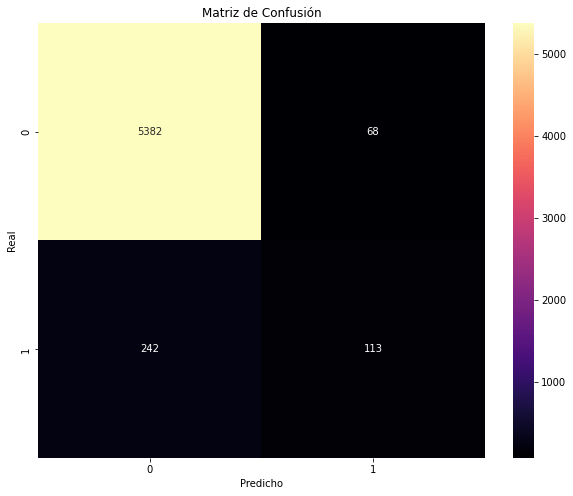

In [16]:
# Revisión de desempeño de XGBoost
y_pred_xgboost = pipeline_xgboost.predict(X_test)
print(classification_report(y_test, y_pred_xgboost))

# Matriz de confusión de XGBoost
cm = confusion_matrix(y_test, y_pred_xgboost)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=pipeline_xgboost.classes_, yticklabels=pipeline_xgboost.classes_, cmap='magma')

plt.xlabel('Predicho')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      5450
           1       0.67      0.26      0.37       355

    accuracy                           0.95      5805
   macro avg       0.81      0.62      0.67      5805
weighted avg       0.94      0.95      0.94      5805



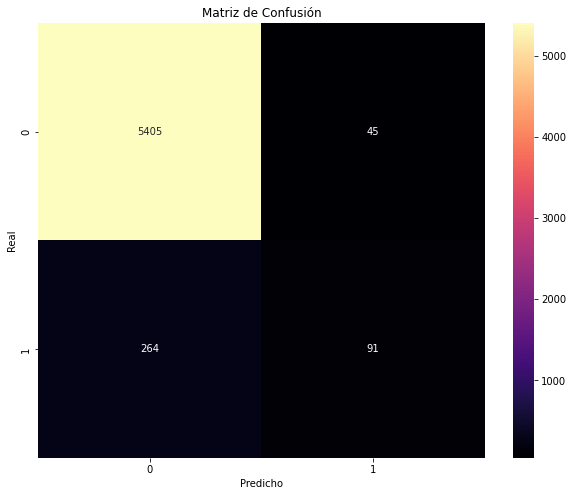

In [17]:
# Revisión de desempeño de LightGBM
y_pred_lightgbm = pipeline_lightgbm.predict(X_test)
print(classification_report(y_test, y_pred_lightgbm))

# Matriz de confusión de LightGBM
cm = confusion_matrix(y_test, y_pred_lightgbm)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=pipeline_lightgbm.classes_, yticklabels=pipeline_lightgbm.classes_, cmap='magma')

plt.xlabel('Predicho')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()

2. **Explicación de métricas**

* Accuracy: Calcula, en base a todas las observaciones, cuáles fueron clasificadas de manera correcta. Es un indicador global que agrupa todas las clasificaciones de las clases dentro del dataset. Representado como fórmula:

\begin{equation*}
    accuracy = \frac{\textit{Total correct predictions}}{\textit{Total predictions}}
\end{equation*}

Si observamos los resultados, vemos que, tanto los modelos `XGBoost` como `LightGBM` obtienen un accuracy general de $0.95$, pero este alto rendimiento es debido a que la clase mayoritaria la representan jugadores sin posición en su selección nacional, por lo que necesitamos ver métricas más específicas para la clase positiva.

* Precision: Calcula, en base a todas las observaciones categorizadas como clase positiva, la proporción de observaciones correctamente clasificadas. Representado como fórmula:

\begin{equation*}
    precision = \frac{TP}{TP + FP}
\end{equation*}

Con esta métrica obtenemos algo más realista con lo que se quiere obtener. `XGBoost` obtiene un valor $precision = 0.62$, mientras que `LightGBM` obtiene un $precision = 0.67$, siendo éste el mayor. Esto nos indica que, dentro de las observaciones catalogadas como positivas, aproximadamente un poco más de la mitad correspondían a la clase verdadera.

* Recall: Calcula, en base a todas las observaciones que debían ser clase positiva, la proporción de observaciones correctamente clasificadas. Representado como fórmula:

\begin{equation*}
    recall = \frac{TP}{TP + FN}
\end{equation*}

Por otro lado, esta métrica obtiene resultados muy bajos, ya que opera sobre las observaciones que pertenecen a la clase positiva, viendo que existe un claro sesgo hacia la clase negativa, ya que muchas observaciones positivas se predijeron erróneamente, consiguiendo $recall = 0.32$ para `XGBoost` y $recall = 0.26$ para `LightGBM`.

A modo general, ambos modelos obtuvieron excelentes métricas en relación a la clase negativa. Esto de sebe principalmente a que, como se vio anteriormente, la proporción entre clase positiva (seleccionado) y negativa (no seleccionado) es bastante dispareja. En estos mismo resultados podemos ver un total de $5.450$ observaciones de la clase negativa versus las $355$ de la clase positiva, por lo que existe un claro sesgo en el entrenamiento hacia la clase que no nos interesa predecir.

3. **Métrica más adecuada**

Para este caso, lo más recomendable sería usar la métrica *recall*, ya que estamos viendo un claro sesgo al clasificar como clase negativa sobre la positiva. Con estos pobres resultados no podríamos decir a ciencia cierta qué modelo se comporta mejor, pero si tuviésemos que escoger uno sería `XGBoost` al obtener métricas un poco mejores en comparación a `LightGBM`.

## 2. Predicción de posiciones de jugadores [4 puntos]

<p align="center">
  <img src="https://pbs.twimg.com/media/E1rfA1aWEAYU6Ny.jpg" width="300">
</p>

En una nueva jornada de desmesuradas transacciones deportivas, Renacín escuchó a sus colegas discutir acerca de que el precio de cada jugador depende en gran medida de la posición en la cancha en la que juega. Y además, que hay bastantes jugadores nuevos que no tienen muy claro en que posición verdaderamente brillarían, por lo que actualmente puede que actualmente estén jugando en posiciones sub-optimas.

Viendo que los resultados del primer análisis no son tan esperanzadores, el corporeo los comanda a cambiar su tarea: ahora, les solicita que construyan un clasificador enfocado en predecir la mejor posición de los jugadores en la cancha según sus características.

Para lograr esto, primero, les pide que etiqueten de la siguiente manera los valores que aparecen en el atributo `Club_Position`, pidiendo que agrupen los valores en los siguientes grupos:

**Nota**:  Renacín les recalca que **no deben utilizar los valores ```Sub``` y ```Res``` de esta columna**.

```python
ataque = ['ST', 'CF']
central_ataque = ['RW', 'CAM', 'LW']
central = ['RM', 'CM', 'LM']
central_defensa = ['RWB', 'CDM', 'LWB']
defensa = ['RB', 'CB', 'LB']
arquero = ['GK']
```

La elección del clasificador se justificar en base a la siguiente [guía](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html) y se deben comentar los resultados obtenidos en la clasificación.

**Tareas:** [1 punto por tarea]

1. En un nuevo dataframe, aplique las etiquetas descritas anteriormente en cada uno de los valores señalados en esta sección y guárdelos en la variable `label`.
2. Cuente cuántos por clase quedan.
3. Entrene el nuevo pipeline y ejecute una evaluación de este.  
4. Comente los resultados obtenidos.

**Respuesta:**

**1. Aplicación de etiquetas**

In [18]:
# Carga de dataset
df = pd.read_csv('stats_players.csv')

# Diccionario con los valores a ingresar en la columna 'label'
label_dict = {
    'ST': 'ataque',
    'CF': 'ataque',
    'RW': 'central_ataque',
    'CAM': 'central_ataque',
    'LW': 'central_ataque',
    'RM': 'central',
    'CM': 'central',
    'LM': 'central',
    'RWB': 'central_defensa',
    'CDM': 'central_defensa',
    'LWB': 'central_defensa',
    'RB': 'defensa',
    'CB': 'defensa',
    'LB': 'defensa',
    'GK': 'arquero'
}

# Editar la columna 'label' en base a la columna 'Club_Position' con el diccionario anterior
df['label'] = df['Club_Position'].map(label_dict)

# Eliminamos observaciones con valores 'NaN'en la columna 'label' (no se pueden predecir en el 
# modelo si no se tienen etiquetas)
df = df.dropna(subset = ['label'])

**2. Conteo por clase**

In [19]:
df['label'].value_counts()

label
defensa            1180
central             907
arquero             632
central_ataque      581
ataque              430
central_defensa     209
Name: count, dtype: int64

Se puede ver que hay muchos jugadores que juegan en posiciones de `defensa`, mientras que hay muy pocos que juegan como `central_defensa`, representando un poco menos de $\frac{1}{5}$ de la clase mayoritaria.

Además, tal como dijo Renacín, no estamos ocupando en este agrupamiento a los jugadores que presentan posiciones `Sub` y `Res`, lo cual explica la poca cantidad de observaciones (jugadores) con posiciones definidas de juego.

**3. Entrenamiento de nuevo Pipeline**

In [20]:
# Transformar las variables numéricas tipo calificación con MinMaxScaler
num_columns = ['Height', 'Weight', 'Age', 'Ball_Control', 'Dribbling', 'Marking', 'Sliding_Tackle', 'Standing_Tackle',
               'Aggression', 'Reactions', 'Interceptions', 'Vision', 'Composure', 'Crossing', 'Short_Pass', 'Long_Pass',
               'Acceleration', 'Speed', 'Stamina', 'Strength', 'Balance', 'Agility', 'Jumping', 'Heading', 'Shot_Power',
               'Finishing', 'Long_Shots', 'Curve', 'Freekick_Accuracy', 'Penalties', 'Volleys']
num_scaler = MinMaxScaler()

# Transformar las variables categóricas con OneHotEncoder
cat_columns = ['Nationality', 'Preffered_Foot', 'Work_Rate', 'Weak_foot', 'Skill_Moves']
cat_encoder = OneHotEncoder(handle_unknown='infrequent_if_exist')

# Crear un ColumnTransformer para aplicar las transformaciones a las columnas correspondientes
from sklearn.compose import ColumnTransformer

col_transformer = ColumnTransformer([
    ('num', num_scaler, num_columns),
    ('cat', cat_encoder, cat_columns)
])

In [21]:
# Separación de datos para entrenamiento y testeo
features = df.drop(columns = ['Name', 'National_Position', 'Club_Position', 'label'])
labels = df.loc[:, 'label']

X_train, X_test, y_train, y_test = train_test_split(
    features, labels, test_size=0.33, shuffle=True, stratify=labels, random_state=30
)

# Dado que estamos haciendo una tarea de clasificación usando menos de 100.000 observaciones,
# lo recomendado por la documentación de scikit-learn es usar un 'Linear SVC'
from sklearn.svm import LinearSVC, SVC

svc_model = LinearSVC()
pipeline_svc = Pipeline([
    ('preprocessor', col_transformer),
    ('classifier', svc_model)
], verbose=True)

# Entrenamiento del modelo
pipeline_svc.fit(X_train, y_train)

[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   0.0s
[Pipeline] ........ (step 2 of 2) Processing classifier, total=   0.1s


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['Height', 'Weight', 'Age',
                                                   'Ball_Control', 'Dribbling',
                                                   'Marking', 'Sliding_Tackle',
                                                   'Standing_Tackle',
                                                   'Aggression', 'Reactions',
                                                   'Interceptions', 'Vision',
                                                   'Composure', 'Crossing',
                                                   'Short_Pass', 'Long_Pass',
                                                   'Acceleration', 'Speed',
                                                   'Stamina', 'Strength',
                                                   'Balance', 'Agility',
                                                   'Jumping', 'Heading',
                                                   'Shot_Power', 'Finishing',
                                                   'Long_Shots', 'Curve',
                                                   'Freekick_Accuracy',
                                                   'Penalties', ...]),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='infrequent_if_exist'),
                                                  ['Nationality',
                                                   'Preffered_Foot',
                                                   'Work_Rate', 'Weak_foot',
                                                   'Skill_Moves'])])),
                ('classifier', LinearSVC())],
         verbose=True)

                 precision    recall  f1-score   support

        arquero       1.00      1.00      1.00       209
         ataque       0.76      0.87      0.81       142
        central       0.57      0.59      0.58       299
 central_ataque       0.49      0.32      0.39       192
central_defensa       0.34      0.14      0.20        69
        defensa       0.78      0.94      0.85       389

       accuracy                           0.73      1300
      macro avg       0.66      0.64      0.64      1300
   weighted avg       0.70      0.73      0.71      1300



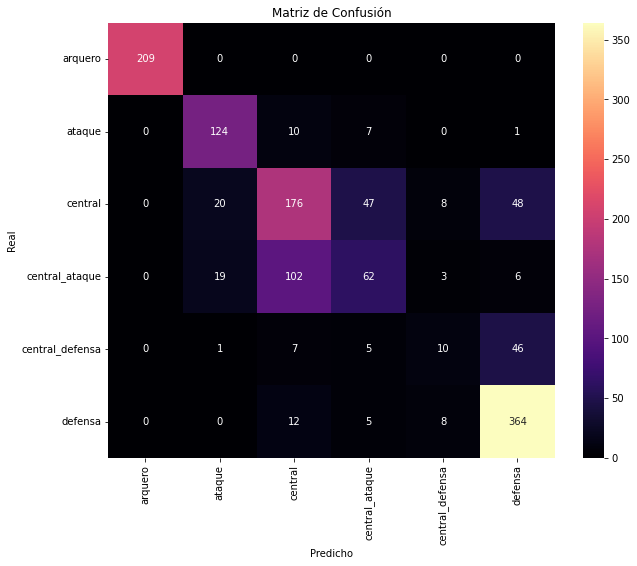

In [22]:
# Revisión de desempeño de Linear SVC
y_pred_svc = pipeline_svc.predict(X_test)
print(classification_report(y_test, y_pred_svc))

# Matriz de confusión de Linear SVC
cm = confusion_matrix(y_test, y_pred_svc)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=pipeline_svc.classes_, yticklabels=pipeline_svc.classes_, cmap='magma')

plt.xlabel('Predicho')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()

**4. Comentario de resultados**

Los resultados obtenidos tienen relación con una mayor cantidad de clases presentes a predecir, además de una distribución más 'uniforme' en los datos. Como podemos ver, todas las observaciones etiquetadas como 'arquero', el modelo pudo clasificarlas correctamente **a pesar de no representar a la clase mayoritaria**. Podemos fijarnos en la métrica *F1-Score* para una mirada más integral en las clasificaciones: las clases que más le cuesta clasificar son las referidas a `central` ($0.59$), `central_ataque` ($0.32$) y `central_defensa` ($0.14$), esto probablemente por las características que pueden llegar a compartir entre ellos mismos (centrales de diferentes posiciones). Jugadores de `ataque` y `defensa` están bien caracterizados, pero se podría mejorar aún más.

## 3. Predicciones de Seleccionados Nacionales para el Jere Klein [30 puntos]

<center>
<img src='https://www.radioactiva.cl/wp-content/uploads/2024/04/Jere-Klein-1-768x432.webp' width=500 />

Después de alcanzar la fama como cantante urbano, Jere Klein decide explorar una nueva faceta. Con su amor por el fútbol y convencido de que los artistas urbanos poseen un talento y versatilidad excepcionales, Jere se embarca en un proyecto innovador: desarrollar un sistema de inteligencia artificial capaz de identificar a jugadores que tienen potencial para convertirse en futbolistas profesionales. Su teoría es que muchos artistas del género urbano chileno, con sus habilidades únicas y su disciplina, podrían destacarse también en el deporte. Con este sistema, Jere espera no solo abrir nuevas oportunidades para sus colegas artistas, sino también demostrar la amplia gama de talentos que pueden ofrecer.

### 3.1 ¿Qué modelo de árbol es más de "pana"? [10 puntos]

<center>
<img src='https://64.media.tumblr.com/39189215a7d3d96823cb359f35b44e05/tumblr_psmrhrR3Xw1qf5hjqo4_540.gif' width=300 />


**Tareas**


1. Considerando el la variable llamada `label` creada en la sección 1.1. Para determinar cuál modelo de árbol sería más adecuado para la tarea en cuestión, utilice PyCaret. Este deberá centrarse exclusivamente en modelos de tipo árbol. Jere ha especificado que busca un modelo que tome decisiones rápidamente y que tenga una baja tasa de falsos positivos, ya que planea invertir en estos jugadores. [3 puntos] 

Para la comparación, utilice los siguientes modelos:

```python
['et', 'rf', 'dt', 'xgboost', 'lightgbm', 'catboost']
```

2. Explique en brevemente que son los modelos de la siguiente lista `['et', 'rf', 'dt']` y como funcionan. [3 punto]

3. Tras realizar la comparación de modelos, seleccione aquel que muestre el mejor rendimiento en términos de velocidad y precisión, especialmente en la reducción de falsos positivos. Utilice la función `evaluate_model` de PyCaret para revisar y analizar los resultados obtenidos en los siguientes aspectos:

  - **Confusión Matrix**: ¿Cómo se encuentran la tasa de verdaderos positivos y verdaderos negativos?
  - **Threshold**: ¿Es acaso el umbral por defecto del modelo el mejor para las predicciones?
  - **Feature Importance**: ¿Cuáles son las variables con mejor desempeño? ¿A qué podría deberse esto?
  - **Learning Curve**: ¿El modelo presenta algún problema?

  [4 puntos]

**Respuesta**

In [23]:
from pycaret.datasets import get_data
from pycaret.classification import *
import os

os.environ["PYCARET_CUSTOM_LOGGING_LEVEL"] = "CRITICAL"

df = pd.read_csv('stats_players.csv')
df['label'] = df['National_Position'].apply(lambda x: 1 if pd.notnull(x) else 0)
df = df.drop(columns = ['Name', 'National_Position'])

# Setup PyCaret
clf = setup(df, target='label', session_id=500)

ImportError: cannot import name '_print_elapsed_time' from 'sklearn.utils' (c:\Users\lucas\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\__init__.py)

In [ ]:
# Comparar un conjunto de modelos
best_model = compare_models(include = ['et', 'rf', 'dt', 'xgboost', 'lightgbm', 'catboost'])

**2. Explicación de algunos modelos**

* Extra Trees Classifier (`et`): 
* Random Forest Classifier (`rf`): 
* Decision Tree Classifier (`dt`): 

**3. Mejor modelo**

### 3.2 Reducción de dimensionalidad [14 puntos]

<center>
<img src='https://i.kym-cdn.com/photos/images/original/002/258/560/668.gif' width=400 />

A pesar de los resultados obtenidos previamente, el manager de Jere ha solicitado el entrenamiento de un modelo de XGBoost utilizando los datos disponibles. Además, se debe proceder a realizar una reducción de dimensionalidad basada en la importancia de las características.

Para llevar a cabo esta tarea:

1. Inicie entrenando un modelo XGBoost con todas las características disponibles. [2 puntos]

2. Una vez el modelo esté entrenado, evalúe y clasifique las características según su importancia de forma descendente. [2 puntos]

3. Utilice esta clasificación para ejecutar una búsqueda recursiva de eliminación de características, eliminando progresivamente las menos importantes y evaluando el impacto en el desempeño del modelo hasta identificar las N características más críticas. [2 puntos]

4. Con este conjunto reducido de características, entrene un nuevo modelo y evalúe su rendimiento. [2 puntos]

5. Posteriormente, responda a las siguientes preguntas para una comprensión más profunda de los cambios y beneficios:

  - ¿El rendimiento del modelo con las características seleccionadas es similar al del modelo original? ¿Cómo se comparan en términos de precisión y robustez? [2 puntos]
  - ¿Cuáles son los beneficios potenciales de eliminar variables del modelo? Considere factores como la simplificación del modelo, reducción del tiempo de entrenamiento, y mejora en la capacidad de generalización. [2 puntos]
  - Comente si el modelo con menor dimensionalidad es más sencillo de explicar. Explique brevemente por qué la eliminación de ciertas características puede facilitar la comprensión y la explicación del comportamiento del modelo. [2 puntos]

Notar que con esta metodologia buscamos encontrar un punto entermedio entre número de festures y desempeño. por esto, si observa que al aumentar festires el aumento es despreciable, puede no considerar agregar más features a su modelo.

**Respuesta**

### 3.3 Calibración Probabilistica [6 puntos]

<center>
<img src='https://media2.giphy.com/media/l2Je4Ku0Cx292KWv6/200w.gif?cid=6c09b952y0sihtq9tb6sz8j2023x3zxxp3qx1ocgonkpkblj&ep=v1_gifs_search&rid=200w.gif&ct=g' width=400 />

Para lograr modelos más modulares, se recomienda realizar una calibración del modelo entrenado anteriormente, con el objetivo de obtener salidas que reflejen mayor modularidad.

1. Se solicita que utilice un método de calibración que asegure que las probabilidades generadas incrementen de manera monótona. Una métrica ampliamente utilizada para evaluar la precisión de la calibración de un modelo es el Brier Score. Calcule el Brier Score para el modelo tanto antes como después de la calibración. Esto le permitirá realizar una comparación cuantitativa y determinar si la calibración ha mejorado el rendimiento del modelo. Para más información sobre el Brier Score, puede consultar el siguiente enlace: [Scikit-Learn - Brier Score Loss](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.brier_score_loss.html). [3 puntos]

2. Tras la calibración, examine y comente los resultados obtenidos. A su análisis añada una comparación visual de las ideales versus las salidas del modelo original (sin calibrar) y del modelo calibrado. [3 puntos]

**Respuesta**